# AOP Network Builder

This notebook demonstrates how to build an Adverse Outcome Pathway (AOP) network by querying data from the [AOP-Wiki RDF](https://aopwiki.rdf.bigcat-bioinformatics.org/) or loading several exported files with the `pyaop` library.

The `AOPNetworkBuilder` class provides methods to construct the network by querying or parsing for AOPs, Key Events (KEs), Key Event Relationships (KERs) #TODO, Molecular Initiating Events (MIEs), genes, compounds, and Key Event components.

After constructing a network, we can retrieve the resulting AOP network by getting the `network` attribute of the builder instance and export it to various formats for further analysis or visualization.

In [1]:
from pyaop.aop.builder import AOPNetworkBuilder

## Querying from AOP-Wiki RDF

An empty builder is initialized from the `AOPNetworkBuilder` class:


In [2]:
builder = AOPNetworkBuilder()
print(builder.network.get_summary())

{'total_key_events': 0, 'mie_count': 0, 'ao_count': 0, 'ke_count': 0, 'ker_count': 0, 'gene_associations': 0, 'gene_expression_associations': 0, 'compound_associations': 0, 'component_associations': 0, 'total_aops': 0}


The builder has several methods to query different aspects of the AOP network:

In [3]:
print("-", "\n- ".join([i for i in dir(builder) if i.startswith("query")]))

- query_by_identifier
- query_components_for_network
- query_compounds_for_network
- query_gene_expression
- query_genes_for_ke
- query_organs_for_kes


Querying will populate the `network` attribute of the builder instance, which is an `AOPNetwork` instance (see [notebook on AOPNetwork]()).

In [4]:
print(type(builder.network))
print("-", "\n- ".join([i for i in dir(builder) if not i.startswith("_")]))

<class 'pyaop.aop.core_model.AOPNetwork'>
- network
- query_by_identifier
- query_components_for_network
- query_compounds_for_network
- query_gene_expression
- query_genes_for_ke
- query_organs_for_kes
- update_from_json


### Querying AOPs

The builder can retrieve Key Events and Key Event Relationships for all AOPs in the AOP-Wiki RDF by calling the `query_components_for_network` method on values:
```python
# AOP identifiers
builder.query_by_identifier(
    query_type="aop", values="https://identifiers.org/aop/1 https://identifiers.org/aop/2"
# MIE identifiers
builder.query_by_identifier(
    query_type="mie", values="https://identifiers.org/aop.events/1502"
)
# Non-MIE KE identifiers
builder.query_by_identifier(
    query_type="ke", values="https://identifiers.org/aop.events/1503"
)
```

In this example, we query for all KE downstream of the MIE with identifier https://identifiers.org/aop.events/1502 (Histone deacetylase inhibition)

In [5]:
builder.query_by_identifier(
    query_type="mie", values="https://identifiers.org/aop.events/1502"
)
print(builder.network.get_summary())

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 0, 'gene_expression_associations': 0, 'compound_associations': 0, 'component_associations': 0, 'total_aops': 3}


### Querying gene associations
The builder can also query for gene associations to KEs in the network. More on the provenance of these annotations in the [documentation]().

In [7]:
builder.query_genes_for_ke(include_proteins=False)
print(builder.network.gene_associations)

[GeneAssociation(ke_uri='https://identifiers.org/aop.events/1503', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1557', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1502', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1515', gene_id='ENSG00000049130', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1502', gene_id='ENSG00000094631', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1262', gene_id='ENSG00000109320', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1505', gene_id='ENSG00000110427', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1262', gene_id='ENSG00000116478', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1515', gene_id='ENSG00000118971', protein_id=None), 

### Querying compound (stressor) associations
The builder can also query for compound (stressor) associations to KEs in the network. More on the provenance of these annotations in the [documentation]().

In [8]:
builder.query_compounds_for_network()
print(builder.network.get_summary())
print(builder.network.compound_associations)

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 0, 'compound_associations': 10, 'component_associations': 0, 'total_aops': 3}
[CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='https://identifiers.org/cas/183506-66-3', chemical_label='Apicidin', pubchem_compound='https://identifiers.org/pubchem.compound/467801', compound_name='Apicidin', cas_id='467801'), CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='https://identifiers.org/cas/183506-66-3', chemical_label='Apicidin', pubchem_compound='https://identifiers.org/pubchem.compound/6918328', compound_name='Apicidin', cas_id='6918328'), CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='https://identifiers.org/cas/

### Querying AOP Component associations
The builder can also query for AOP components for the KEs in the network. More on the provenance of these annotations in the [documentation]().

In [9]:
builder.query_components_for_network()
print(builder.network.get_summary())
print(builder.network.component_associations)

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 0, 'compound_associations': 10, 'component_associations': 7, 'total_aops': 3}
[ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1239', ke_name='', process='http://purl.obolibrary.org/obo/GO_0010467', process_name='gene expression', object='', object_name='', action='abnormal', object_type=''), ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1262', ke_name='', process='http://purl.obolibrary.org/obo/GO_0006915', process_name='apoptotic process', object='', object_name='', action='increased', object_type=''), ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1502', ke_name='', process='http://purl.obolibrary.org/obo/GO_0004857', process_name='enzyme inhibitor activity', object='http://purl.obolibrary.org/obo/PR_000008478', object_name='histone deacetylase 1', action='decreased', object_type='http://pu

## Exporting the resulting AOP Network
After building the network, we can export it to various formats:

### Export to Cytoscape JSON
The network and its styles are exported to Cytoscape JSON format using the `to_cytoscape_elements` method.

In [10]:
my_aop_network = builder.network
cy_network = my_aop_network.to_cytoscape_elements()
print(cy_network.keys())

dict_keys(['elements', 'style', 'layout'])


In [11]:
elements = cy_network["elements"]
stylesheet = cy_network["style"]
layout = cy_network["layout"]

### Interactive network visualization in Cytoscape

In [12]:
from dash import Dash, html
import dash_cytoscape as cyto

app = Dash()

app.layout = html.Div(
    [
        cyto.Cytoscape(
            id="cytoscape-aop-network",
            layout=layout,
            stylesheet=stylesheet,
            elements=elements,
            style={"width": "100%", "height": "800px"},
        )
    ]
)
app.run(mode="inline")

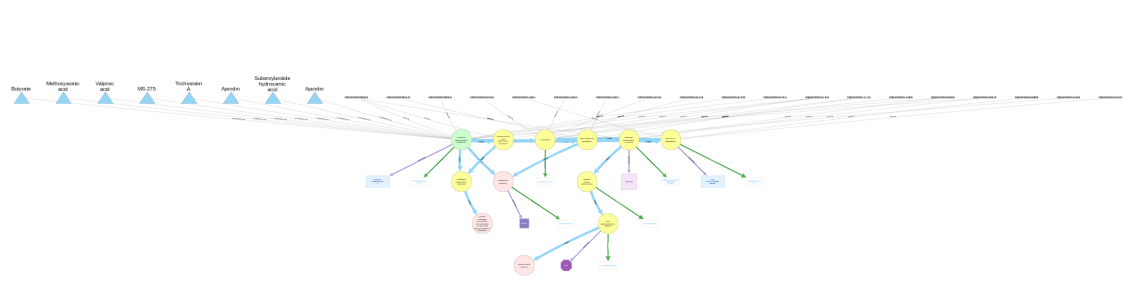

## Loading an AOP Network from Cytoscape JSON
The exported Cytoscape JSON elements can be loaded back into an `AOPNetwork` instance using the `from_cytoscape_elements` class method.

We can verify that the round-trip conversion (AOPNetwork > Cytoscape > AOPNetwork) preserves the data integrity:

In [13]:
round_build = AOPNetworkBuilder()

In [14]:
round_build.update_from_json(cy_network)


In [15]:
# Test round-trip data integrity
original_summary = builder.network.get_summary()
loaded_summary = round_build.network.get_summary()

print("Round-trip integrity check:")
for key in original_summary:
    original_val = original_summary[key]
    loaded_val = loaded_summary[key]
    status = "y" if original_val == loaded_val else "x"
    print(f"{status} {key}: {original_val} → {loaded_val}")

# Check AOP info preservation
original_aops = set(builder.network.aop_info.keys())
loaded_aops = set(round_build.network.aop_info.keys())
aop_status = "y" if original_aops == loaded_aops else "x"
print(f"{aop_status} AOP IDs preserved: {len(original_aops)} → {len(loaded_aops)}")

round_trip_network = round_build.network.to_cytoscape_elements()

Round-trip integrity check:
y total_key_events: 12 → 12
y mie_count: 1 → 1
y ao_count: 3 → 3
y ke_count: 8 → 8
y ker_count: 17 → 17
y gene_associations: 26 → 26
y gene_expression_associations: 0 → 0
y compound_associations: 10 → 10
y component_associations: 7 → 7
y total_aops: 3 → 3
y AOP IDs preserved: 3 → 3


In [16]:
app = Dash()

app.layout = html.Div(
    [
        cyto.Cytoscape(
            id="cytoscape-aop-network",
            layout=round_trip_network["layout"],
            stylesheet=round_trip_network["style"],
            elements=round_trip_network["elements"],
            style={"width": "100%", "height": "800px"},
        )
    ]
)
app.run(mode="inline")

### Export to Cytoscape CX2
The network, metadata, and its styles are exported to Cytoscape Export format (CX2) using the `to_cx2` method.

### Export to RDF
The network can be exported to RDF using the `to_rdf` method.